In [27]:
import pandas as pd


df = pd.read_csv("./Desktop/google/googleplaystore_user_reviews.csv")

df = df.dropna()

df = df.head(5000)
len(df)

5000

In [31]:
reviews = df['Translated_Review'].str.cat(sep=' ')


translation_table = dict.fromkeys(map(ord, '!@#$(),?.":'), None)
reviews = reviews.translate(translation_table)
tokens = reviews.split()


In [37]:
from nltk.corpus import stopwords 

stop_words = set(stopwords.words('english')) 

tokens = [token.lower() for token in tokens]
tokens = [token for token in tokens if token not in stop_words]

reviews = ' '.join(tokens)
len(tokens)

76614

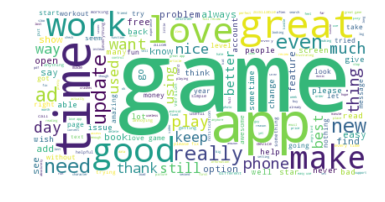

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(background_color="white").generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [44]:
reviews

"like eat delicious food that's i'm cooking food case 10 best foods helps lot also best shelf life help eating healthy exercise regular basis works great especially going grocery store best idea us best way amazing looking forward app helpful site help foods get good useful information amount spelling errors questions validity information shared fixed 5 stars given thank great app add arthritis eyes immunity kidney/liver detox foods please greatest ever completely awesome maintain health must ppl love good health good health first priority health important world either life think mrs sunita bhati thankful developersto make kind app really good healthy food body useful diabetes age 30 need control sugar thanks one greatest apps good nice healthy really helped god health health always top priority mysg5 excellent useful found lot wealth form health found important healthy eating good simply good test good thanks advice downloaded adobe reader still can't get recipe book recipe book unabl

In [46]:
import nltk
bigram = list(nltk.bigrams(reviews.split()))
fdist = nltk.FreqDist(bigram)
src = []
to = []
freq = []

for k,v in fdist.items():
    src.append(k[0])
    to.append(k[1])
    freq.append(v)
    
df = pd.DataFrame({'src': src, 'to': to, 'frea': freq})

df.to_csv('reviews.csv')
